# **Exploring Deforestation Trends:** 
# **A Cross-Continental Analysis and Environmental Insights**

**Introduction**

Deforestation, the widespread removal of forests, has emerged as a critical global environmental issue with far-reaching consequences. Forests play a multifaceted role in maintaining environmental equilibrium, encompassing vital functions such as carbon sequestration and biodiversity preservation. The study of deforestation trends is of paramount importance for the formulation of well-informed environmental policies.

This report is anchored in the research conducted by Meyer, Van Kooten, and Wang (2003), which has laid the groundwork for comprehending the nuanced relationship between environmental degradation and governance. Embarking on a comprehensive exploration, this report combines political analysis and data-driven methodologies to illuminate the intricate relationship between environmental degradation and governance. Its objective lies in delving into deforestation trends across continents and examining the influence of political and economic factors. By synthesizing insights from both the field of political science and rigorous data analysis, this report aims to contribute to a holistic understanding of the multifarious nature of deforestation.

It's important to note that this analysis serves as an introductory exploration Meyer, Van Kooten, and Wang's article. While this study touches upon several key facets, it acknowledges the existence of unknown factors and variables beyond the scope of this report. This curiosity-driven inquiry seeks to uncover preliminary insights and patterns, recognizing that further research and comprehensive studies are essential for a complete understanding of the complex issue of deforestation.

**Methodology**

The primary dataset used for this research was obtained from the file 'goal15.forest_shares.csv'. This dataset contains information on deforestation trends in 236 countries, spanning the years 2000 to 2020. Additionally, data from the International Monetary Fund's World Economic Outlook (October 2021) was utilized to gather GDP values for the year 2020 and the Corruption Perceptions Index (CPI) for 2020, provided by Transparency International, was used to measure the perceived levels of corruption in different countries. 

The dataset encompasses data from 236 countries, along with overall global values. Notably, 10 countries lack data representation in this dataset, is removed for a more clear analysis. In cases where data was missing for specific records, we chose to remove those records from our analysis. This approach was applied when missing values were minimal and didn't significantly affect the overall dataset.The classification of countries into geographical continents, rather than socio-political categories, has been employed for grouping. While this approach may introduce slight variations in calculations, these differences are minimal and do not significantly impact the overall findings and conclusions presented in this report.

Prior to analysis, data preprocessing steps were undertaken to ensure data quality and consistency. Missing values were addressed through appropriate techniques to determine their impact on the analysis. Country codes were mapped to continents based on the provided ISO3C codes, allowing for continent-level aggregations.

Several key variables were utilized in the analysis, including 'forests_2000', 'forests_2020', 'trend' (deforestation trend), 'GDP (2020)', and 'CPI (2020)'. 'Forests_2000' and 'forests_2020' represent the percentage of forest area in a country for the years 2000 and 2020, respectively. 'Trend' captures the change in forest area over this period. 'GDP (2020)' denotes the Gross Domestic Product for the year 2020, while 'CPI (2020)' reflects the Corruption Perceptions Index scores for the same year.

Descriptive statistics were calculated to provide an overview of the dataset. These included mean, median, standard deviation, and quartiles for deforestation across different continents. Correlation analysis was performed to explore potential relationships between GDP, CPI values, and deforestation. The findings were brought to life through visually insightful bar charts and pie charts.

 

**Data Analysis and Main Findings**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Load the dataset and remove missing data
def_df = pd.read_csv('/kaggle/input/deforestation-dataset/goal15.forest_shares.csv')
def_df = def_df.dropna()
def_df

,iso3c,forests_2000,forests_2020,trend
0,AFG,1.9,1.9,0.0
1,ALB,28.1,28.8,2.5
2,DZA,0.7,0.8,14.3
3,ASM,88.7,85.7,-3.4
4,AND,34.0,34.0,0.0
...,...,...,...,...
232,ESH,2.5,2.5,0.0
233,WLD,31.9,31.2,-2.2
234,YEM,1.0,1.0,0.0
235,ZMB,63.3,60.3,-4.7


In [3]:
#Create a dictionary to map ISO3 codes to continents
country_to_continent = {
    'ABW': 'South America',
    'AFG': 'Asia',
    'AGO': 'Africa',
    'AIA': 'North America',
    'ALB': 'Europe',
    'AND': 'Europe',
    'ARE': 'Asia',
    'ARG': 'South America',
    'ARM': 'Asia',
    'ASM': 'Oceania',
    'ATG': 'North America',
    'AUS': 'Oceania',
    'AUT': 'Europe',
    'AZE': 'Asia',
    'BDI': 'Africa',
    'BEL': 'Europe',
    'BEN': 'Africa',
    'BES': 'South America',
    'BFA': 'Africa',
    'BGD': 'Asia',
    'BGR': 'Europe',
    'BHR': 'Asia',
    'BHS': 'North America',
    'BIH': 'Europe',
    'BLM': 'North America',
    'BLR': 'Europe',
    'BLZ': 'North America',
    'BMU': 'North America',
    'BOL': 'South America',
    'BRA': 'South America',
    'BRB': 'North America',
    'BRN': 'Asia',
    'BTN': 'Asia',
    'BWA': 'Africa',
    'CAF': 'Africa',
    'CAN': 'North America',
    'CHE': 'Europe',
    'CHL': 'South America',
    'CHN': 'Asia',
    'CIV': 'Africa',
    'CMR': 'Africa',
    'COD': 'Africa',
    'COG': 'Africa',
    'COK': 'Oceania',
    'COL': 'South America',
    'COM': 'Africa',
    'CPV': 'Africa',
    'CRI': 'North America',
    'CUB': 'North America',
    'CUW': 'South America',
    'CYM': 'North America',
    'CYP': 'Asia',
    'CZE': 'Europe',
    'DEU': 'Europe',
    'DJI': 'Africa',
    'DMA': 'North America',
    'DNK': 'Europe',
    'DOM': 'North America',
    'DZA': 'Africa',
    'ECU': 'South America',
    'EGY': 'Africa',
    'ERI': 'Africa',
    'ESH': 'Africa',
    'ESP': 'Europe',
    'EST': 'Europe',
    'ETH': 'Africa',
    'FIN': 'Europe',
    'FJI': 'Oceania',
    'FRA': 'Europe',
    'FRO': 'Europe',
    'FSM': 'Oceania',
    'GAB': 'Africa',
    'GBR': 'Europe',
    'GEO': 'Asia',
    'GGY': 'Europe',
    'GHA': 'Africa',
    'GIN': 'Africa',
    'GLP': 'North America',
    'GMB': 'Africa',
    'GNB': 'Africa',
    'GNQ': 'Africa',
    'GRC': 'Europe',
    'GRD': 'North America',
    'GTM': 'North America',
    'GUF': 'South America',
    'GUM': 'Oceania',
    'GUY': 'South America',
    'HND': 'North America',
    'HRV': 'Europe',
    'HTI': 'North America',
    'HUN': 'Europe',
    'IDN': 'Asia',
    'IMN': 'Europe',
    'IND': 'Asia',
    'IRL': 'Europe',
    'IRN': 'Asia',
    'IRQ': 'Asia',
    'ISL': 'Europe',
    'ISR': 'Asia',
    'ITA': 'Europe',
    'JAM': 'North America',
    'JEY': 'Europe',
    'JOR': 'Asia',
    'JPN': 'Asia',
    'KAZ': 'Asia',
    'KEN': 'Africa',
    'KGZ': 'Asia',
    'KHM': 'Asia',
    'KIR': 'Oceania',
    'KNA': 'North America',
    'KOR': 'Asia',
    'KWT': 'Asia',
    'LAO': 'Asia',
    'LBN': 'Asia',
    'LBR': 'Africa',
    'LBY': 'Africa',
    'LCA': 'North America',
    'LIE': 'Europe',
    'LKA': 'Asia',
    'LSO': 'Africa',
    'LTU': 'Europe',
    'LUX': 'Europe',
    'LVA': 'Europe',
    'MAF': 'North America',
    'MAR': 'Africa',
    'MDA': 'Europe',
    'MDG': 'Africa',
    'MDV': 'Asia',
    'MEX': 'North America',
    'MHL': 'Oceania',
    'MKD': 'Europe',
    'MLI': 'Africa',
    'MLT': 'Europe',
    'MMR': 'Asia',
    'MNE': 'Europe',
    'MNG': 'Asia',
    'MNP': 'Oceania',
    'MOZ': 'Africa',
    'MRT': 'Africa',
    'MSR': 'North America',
    'MTQ': 'North America',
    'MUS': 'Africa',
    'MWI': 'Africa',
    'MYS': 'Asia',
    'MYT': 'Africa',
    'NAM': 'Africa',
    'NCL': 'Oceania',
    'NER': 'Africa',
    'NFK': 'Oceania',
    'NGA': 'Africa',
    'NIC': 'North America',
    'NIU': 'Oceania',
    'NLD': 'Europe',
    'NOR': 'Europe',
    'NPL': 'Asia',
    'NZL': 'Oceania',
    'PAK': 'Asia',
    'PAN': 'North America',
    'PCN': 'Oceania',
    'PER': 'South America',
    'PHL': 'Asia',
    'PLW': 'Oceania',
    'PNG': 'Oceania',
    'POL': 'Europe',
    'PRI': 'North America',
    'PRK': 'Asia',
    'PRT': 'Europe',
    'PRY': 'South America',
    'PSE': 'Asia',
    'PYF': 'Oceania',
    'REU': 'Africa',
    'ROU': 'Europe',
    'RUS': 'Europe',
    'RWA': 'Africa',
    'SAU': 'Asia',
    'SDN': 'Africa',
    'SEN': 'Africa',
    'SGP': 'Asia',
    'SHN': 'Africa',
    'SLB': 'Oceania',
    'SLE': 'Africa',
    'SLV': 'North America',
    'SMR': 'Europe',
    'SOM': 'Africa',
    'SPM': 'North America',
    'SRB': 'Europe',
    'SSD': 'Africa',
    'STP': 'Africa',
    'SUR': 'South America',
    'SVK': 'Europe',
    'SVN': 'Europe',
    'SWE': 'Europe',
    'SWZ': 'Africa',
    'SXM': 'North America',
    'SYC': 'Africa',
    'SYR': 'Asia',
    'TCA': 'North America',
    'TCD': 'Africa',
    'TGO': 'Africa',
    'THA': 'Asia',
    'TJK': 'Asia',
    'TKM': 'Asia',
    'TLS': 'Asia',
    'TON': 'Oceania',
    'TTO': 'North America',
    'TUN': 'Africa',
    'TUR': 'Asia',
    'TUV': 'Oceania',
    'TZA': 'Africa',
    'UGA': 'Africa',
    'UKR': 'Europe',
    'URY': 'South America',
    'USA': 'North America',
    'UZB': 'Asia',
    'VCT': 'North America',
    'VEN': 'South America',
    'VGB': 'North America',
    'VIR': 'North America',
    'VNM': 'Asia',
    'VUT': 'Oceania',
    'WLF': 'Oceania',
    'WSM': 'Oceania',
    'YEM': 'Asia',
    'ZAF': 'Africa',
    'ZMB': 'Africa',
    'ZWE': 'Africa',
    'WLD': 'World'
}

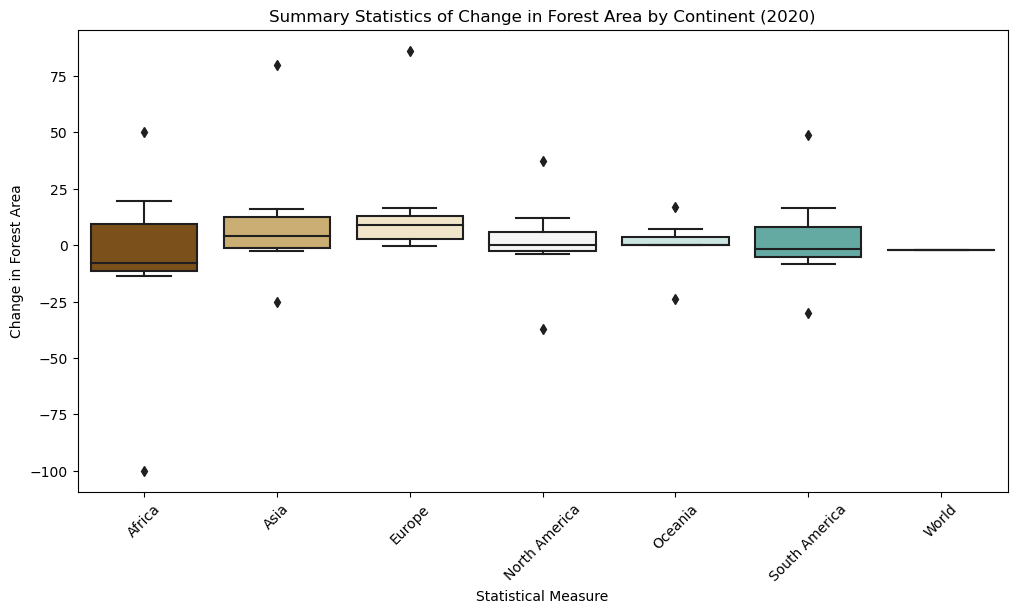

In [4]:
#Add a new column 'continent'
def_df = def_df.copy()
def_df['continent'] = def_df['iso3c'].map(country_to_continent)

#Group data by continent, calculate summary statistics for 'trend', display grouped data
grouped_def = def_df.groupby('continent')['trend'].describe()

#Create a boxplot
transposed_def = grouped_def.transpose()

custom_colors = ['#8c510a','#d8b365','#f6e8c3','#f5f5f5','#c7eae5','#5ab4ac','#01665e'] 
plt.figure(figsize=(12, 6))
sns.boxplot(data=transposed_def.iloc[1:], palette=custom_colors)
plt.title('Summary Statistics of Change in Forest Area by Continent (2020)')
plt.xlabel('Statistical Measure')
plt.ylabel('Change in Forest Area')
plt.xticks(rotation=45)
plt.show()

According to the dataset, deforestation trends exhibit diverse patterns and implications across different continents: 

* Across Africa, there is an average change in forest area of -8.62, indicating a notable reduction in forest cover. This reflects a complex interplay of environmental and socio-economic factors. The relatively high standard deviation of 19.35 underscores the significant variability in forest area changes among African countries.

* In contrast, Asia experiences an average change in forest area of 3.99, suggesting an overall increase in forest cover. The moderate standard deviation of 16.11 implies varying degrees of forest area change across Asian nations.

* Europe reveals an average change in forest area of 9.21, pointing to a general expansion of forested areas. The standard deviation of 16.35 signifies moderate variability, highlighting different conservation efforts and practices in European countries.

* North America displays a slight decrease in forest cover, with an average change in forest area of -1.49. The relatively low standard deviation of 11.38 indicates consistent forest area change trends across North American nations. 

* Oceania demonstrates a relatively stable forest cover, with an average change in forest area of 0.20. The low standard deviation of 7.21 reflects a degree of uniformity in forest area change patterns among Oceanian countries.

* In South America, there is a slight reduction in forested areas, with an average change in forest area of -2.02. The notable standard deviation of 18.25 highlights substantial variations in forest area change rates within the continent. 

* Globally, the single data point representing the entire world reveals an average change in forest area of -2.20, providing insight into the overall state of forest cover worldwide.

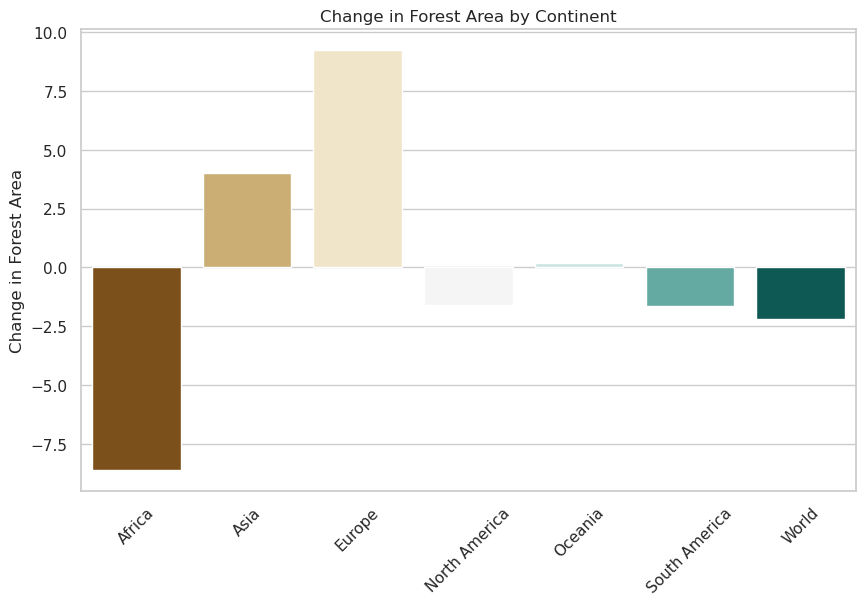

In [5]:
#Calculate mean trend for each continent
continent_stats = def_df.groupby('continent')['trend'].mean()
continent_stats = continent_stats.reset_index()

#Create a bar plot for mean deforestation trends by continent
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='continent', y='trend', data=continent_stats, errorbar=None, palette=custom_colors)
plt.title('Change in Forest Area by Continent')
plt.xlabel('')
plt.ylabel('Change in Forest Area')
plt.xticks(rotation=45)
plt.show()

***Factors Influencing Deforestation: A Cross-Country Perspective***

The trends in deforestation rates across continents and countries can be attributed to a complex interplay of economic, institutional, and social factors. The study by Meyer, Van Kooten, and Wang (2003) sheds light on the nuanced relationships between these factors and deforestation, providing insights that can help explain the observed patterns.

According to their study, economic development and its impact on deforestation reveal an intricate relationship, often characterized by the environmental Kuznets curve (EKC)*. Countries with varying levels of economic prosperity may experience different deforestation trends. The presence of a positive correlation between per capita GDP (Gross Domestic Product) and deforestation rates could indicate higher resource extraction for economic growth. Conversely, some countries may exhibit a negative correlation, reflecting the ability to invest in forest regeneration due to reliance on forest product exports.

Institutions and social capital also play a vital role in influencing deforestation patterns. Strong financial institutions and stable monetary policies may affect the incentives for managing forestlands. Additionally, trust and transparency within a society, measured by indicators like the 'control of corruption' index, can influence the likelihood of liquidating forest assets. The level of corruption and governance practices within a country can impact the pace of deforestation.

>*The environmental Kuznets curve (EKC) is a hypothesized relationship between various indicators of environmental degradation and per capita income. In the early stages of economic growth, pollution emissions increase and environmental quality declines, but beyond some level of per capita income (which will vary for different indicators) the trend reverses, so that at high income levels, economic growth leads to environmental improvement. See Stern, The Environmental Kuznets Curve, 2018.*

***Examining Economic Context: GDP per capita and its Potential Influence on Deforestation***

This section of the analysis delves into the economic aspect of deforestation trends by exploring the relationship between a country's economic prosperity, as represented by Gross Domestic Product (GDP) per capita for the year of 2020 (IMF, 2021), and its potential influence on deforestation.

In [6]:
#Create a dictionary with GDP data
gdp_data = {
    'Continent': ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America', 'World'],
    'GDP (2020)': [5.079, 13.725, 38.856, 45.284, 37.947, 14.679, 17.253],
}
 
#Create a DataFrame set 'Continent' column as the index
gdp_df = pd.DataFrame(gdp_data)
gdp_df.set_index('Continent', inplace=True)
gdp_df

,GDP (2020)
Continent,
Africa,5.079
Asia,13.725
Europe,38.856
North America,45.284
Oceania,37.947
South America,14.679
World,17.253


The table showcases the GDP per capita values for six geographical regions: Africa, Asia, Europe, North America, Oceania, South America, and additionally, the global numbers. Notably, these values vary significantly among the regions, reflecting diverse economic landscapes.

Among the continents, Asia and Europe emerge as economic powerhouses with GDP per capita values of 13.725 and 38.856, respectively. This indicates relatively higher income levels for the population within these regions. North America, including the United States and Canada, closely follows Europe with a GDP per capita value of 45.284. This signifies a strong economic position in terms of income per person. Oceania, South America, and Africa exhibit comparatively lower GDP per capita values, indicating varying degrees of economic development. These regions face unique economic challenges and opportunities.

The dataset also includes a global perspective, represented as "World," with a GDP per capita value of 17.253. This provides an overarching view of the global economic landscape.

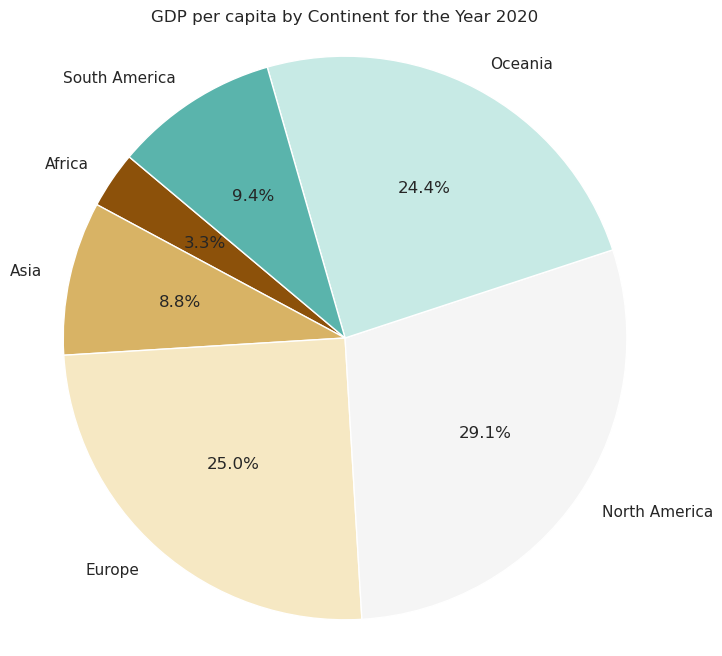

In [7]:
#Plot a pie chart
gdp_df_for_chart = gdp_df.drop('World')


plt.figure(figsize=(8, 8))
plt.pie(gdp_df_for_chart['GDP (2020)'], labels=gdp_df_for_chart.index, autopct='%.1f%%', startangle=140, colors=custom_colors)
plt.title('GDP per capita by Continent for the Year 2020')
plt.axis('equal')
plt.show()

*IMF, (2021)*

The pie chart above illustrates the distribution of GDP among different continents for the year 2020. The chart demonstrates that North America holds the highest GDP per capita with 29.1%, followed closely by Europe and Ocenia with respectively, 25% and 24.4%. The remaining continents, including South America, Asia and, Africa contribute to a smaller share of the global GDP, with a total of 21.5%.

***Understanding Corruption's Influence: The CPI as a Key Indicator***

As mentioned before, corruption is a widespread challenge that affects governance and public trust and can have far-reaching implications for environmental policies and conservation efforts. To assess corruption levels, Transparency International's Corruption Perception Index (CPI) for the year 2020 was analyzed. 

In [8]:
#Read file remove the excessive columns
cpi_df = pd.read_excel('/kaggle/input/global-corruption-index-2021/CPI2021_GlobalResultsTrends.xlsx', sheet_name="CPI Timeseries 2012 - 2021", skiprows=2)
cpi_df = cpi_df[['ISO3', 'Region', 'CPI score 2020']].sort_values(by='CPI score 2020', ascending=False)
cpi_df

#Check missing data and drop missing data
cpi_df[cpi_df.isna().any(axis=1)]
cpi_df = cpi_df.dropna()

#Add a new column 'continent'
cpi_df = cpi_df.copy()
cpi_df['Continent'] = cpi_df['ISO3'].map(country_to_continent)
cpi_df

,ISO3,Region,CPI score 2020,Continent
0,DNK,WE/EU,88.0,Europe
1,NZL,AP,88.0,Oceania
2,FIN,WE/EU,85.0,Europe
3,SGP,AP,85.0,Asia
4,SWE,WE/EU,85.0,Europe
...,...,...,...,...
175,YEM,MENA,15.0,Asia
176,VEN,AME,15.0,South America
177,SYR,MENA,14.0,Asia
178,SOM,SSA,12.0,Africa


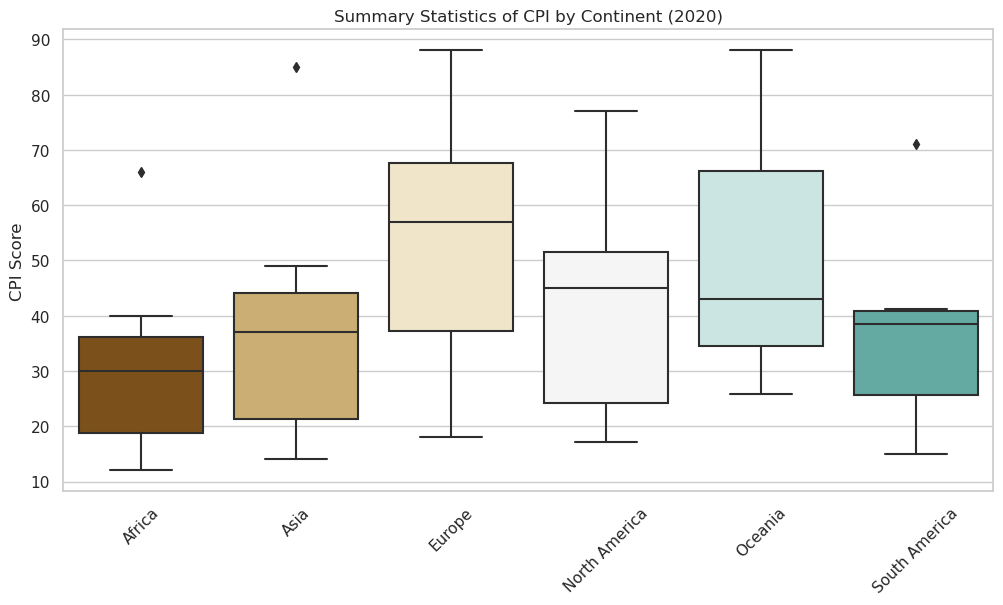

In [9]:
#Group dataframe by continents
grouped_cpi = cpi_df.groupby('Continent')['CPI score 2020'].describe()
grouped_cpi

transposed_cpi = grouped_cpi.transpose()

#Create a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=transposed_cpi.iloc[1:], palette=custom_colors)
plt.title('Summary Statistics of CPI by Continent (2020)')
plt.xlabel('')
plt.ylabel('CPI Score')
plt.xticks(rotation=45)
plt.show()

*Transparency.org, (2021)*

The boxplot above showcases the CPI scores for different continents and derives key statistical measures to better understand the distribution and variation of scores across continents. The scores range from 0 (highly corrupt) to 100 (very clean). Through the perceived levels of corruption within each region and th aim is to understand the variations in scores, providing valuable insights for policymakers, researchers, and organizations working to combat corruption globally:

In terms of the mean CPI scores, Europe exhibits the highest value with an average of 59.38, closely followed by Oceania at 55.40. Africa and South America have relatively lower mean CPI scores of 32.46 and 40.58, respectively. Asia and North America have mean scores of 39.40 and 45.05, respectively. The distribution of CPI scores across continents varies, with Europe having a wider range (30.0 to 88.0) compared to other continents. Africa, Asia, and South America display similar ranges with scores spanning from 12.0 to 66.0, 14.0 to 85.0, and 15.0 to 71.0, respectively. Oceania's range is from 27.0 to 88.0. These statistics provide insights into the perceptions of corruption across continents, revealing variations in transparency and accountability across regions.

**Conclusion**

***GDP, CPI, and Deforestation***

The correlation between GDP per capita and deforestation trends across different continents suggests that economic prosperity and deforestation may be intertwined. Higher GDP per capita regions, such as Europe and North America, tend to have more positive or less negative deforestation trends. This might indicate that economies with higher GDP per capita have the resources to invest in sustainable practices, afforestation, and conservation efforts. However, it's important to note that this relationship may not be linear, as certain highly developed countries might also have high consumption patterns, leading to increased demand for resources and potential environmental impact.

Additionally, the potential correlation between CPI values and deforestation trends raises intriguing questions about the role of governance and institutions in environmental conservation. Regions with lower corruption perception scores (indicating better governance) tend to have less negative deforestation trends. This could imply that stronger institutions are better equipped to enforce environmental regulations, prevent illegal logging, and promote sustainable practices. On the other hand, regions with higher corruption perception scores might struggle with enforcement and accountability, leading to more negative deforestation trends.

It is worth mentioning that the dataset used for the CPI Score and Deforestation Trend by Continent is based on the availability of CPI scores, resulting in a smaller dataset of 179 countries (rather than 227 countries as in the graph representing GDP per Capita and Deforestation Trend by Continent) due to the coverage of Transparency International's survey.

Since characteristics of every country is unique, it's important to consider these factors in combination. For example, a region with high GDP and low corruption perception scores might be particularly effective in curbing deforestation through investments in sustainable practices and effective governance. Conversely, regions with low GDP and high corruption perception scores might face challenges in implementing conservation measures.

***Policy Implications***

These findings could inform policy decisions aimed at addressing deforestation. Policymakers may need to focus on a combination of economic development, strong institutions, and effective governance to achieve sustainable forest management. Collaborative efforts between governments, international organizations, and local communities could be crucial in implementing and monitoring conservation initiatives.

***Research and Further Studies***

While correlations provide valuable insights, they don't establish causation. Further research is needed to understand the complex interplay between GDP, corruption, and deforestation. The longitudinal studies, case studies, and qualitative research could provide deeper understanding of the mechanisms at play. 

Another important factor is that the study primarily focuses on analyzing deforestation trends without considering the continent's land surface areas. As highlighted by The World Bank (2023), the relationship between deforestation and land surface-to-deforestation ratio can significantly influence the interpretation of deforestation rates. Regions with larger land surfaces might exhibit higher rates of deforestation due to their sheer size, rather than solely due to economic factors. This attribute, which could potentially influence the outcome of our analysis, should be acknowledged and explored further in future studies.


Overall, while this analysis aims to shed light on the correlation between corruption perceptions, economic indicators, and deforestation trends, it's still important to acknowledge that it serves as an introductory exploration, touching upon selected facets of the article's broader research. As the referenced article itself acknowledges the existence of potentially unknown factors, this report was driven by curiosity and the desire to offer additional perspectives on the subject matter.

# **References**

**Main Dataset:**
- '/kaggle/input/deforestation-dataset/goal15.forest_shares.csv'

**Supporting Datasets:**

- IMF. (2021). *International Monetary Fund World Economic Outlook*. [Data set]. [Link](https://www.imf.org/en/Publications/WEO/weo-database/2021/October/weo-report?c=512%2C914%2C612%2C614%2C311%2C213%2C911%2C314%2C193%2C122%2C912%2C313%2C419%2C513%2C316%2C913%2C124%2C339%2C638%2C514%2C218%2C963%2C616%2C223%2C516%2C918%2C748%2C618%2C624%2C522%2C622%2C156%2C626%2C628%2C228%2C924%2C233%2C632%2C636%2C634%2C238%2C662%2C960%2C423%2C935%2C128%2C611%2C321%2C243%2C248%2C469%2C253%2C642%2C643%2C939%2C734%2C644%2C819%2C172%2C132%2C646%2C648%2C915%2C134%2C652%2C174%2C328%2C258%2C656%2C654%2C336%2C263%2C268%2C532%2C944%2C176%2C534%2C536%2C429%2C433%2C178%2C436%2C136%2C343%2C158%2C439%2C916%2C664%2C826%2C542%2C967%2C443%2C917%2C544%2C941%2C446%2C666%2C668%2C672%2C946%2C137%2C546%2C674%2C676%2C548%2C556%2C678%2C181%2C867%2C682%2C684%2C273%2C868%2C921%2C948%2C943%2C686%2C688%2C518%2C728%2C836%2C558%2C138%2C196%2C278%2C692%2C694%2C962%2C142%2C449%2C564%2C565%2C283%2C853%2C288%2C293%2C566%2C964%2C182%2C359%2C453%2C968%2C922%2C714%2C862%2C135%2C716%2C456%2C722%2C942%2C718%2C724%2C576%2C936%2C961%2C813%2C726%2C199%2C733%2C184%2C524%2C361%2C362%2C364%2C732%2C366%2C144%2C146%2C463%2C528%2C923%2C738%2C578%2C537%2C742%2C866%2C369%2C744%2C186%2C925%2C869%2C746%2C926%2C466%2C112%2C111%2C298%2C927%2C846%2C299%2C582%2C487%2C474%2C754%2C698%2C&amp;s=NGDPD%2CPPPGDP%2C&amp;sy=2020&amp;ey=2021&amp;ssm=0&amp;scsm=0&amp;scc=0&amp;ssd=1&amp;ssc=0&amp;sic=0&amp;sort=country&amp;ds=.&amp;br=1).

- Transparency.org. (2021). *2020 corruption perceptions index - explore the results.* [Data set].  [Link](https://www.transparency.org/en/cpi/2020 ).

**Article Reference:**
- Meyer, A. L., Van Kooten, G. C., & Wang, S. (2003). Institutional, social and economic roots of deforestation: a cross-country comparison. *The International Forestry Review*, 5(1), 29–37. [Link](http://www.jstor.org/stable/43739299)
- Stern, D. I. (2018). The Environmental Kuznets Curve. *Earth Systems and Environmental Sciences*. https://doi.org/10.1016/b978-0-12-409548-9.09278-2 
- The World Bank. (2023). *Deforestation: Accelerating climate change and threatening biodiversity: SDG 15: Life on land.* Atlas of Sustainable Development Goals 2023. https://sdga2022.github.io/sdga2022/goal-15-life-on-land 